<a href="https://colab.research.google.com/github/vvsrupesh/Colab-Notebooks/blob/main/churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git remote add origin https://github.com/vvsrupesh/Colab-Notebooks.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# we are gng to know futures in Auto ml(h2o) when compared with "tpot" and "vimL"
# key features of h2o is it can do data preprocessing
# like categorical data Encoding, either to numberical or one hot encoding
# it can take care of missing value computation, data cleaning activity
# it can take care of output-> model selection and hyper parameters tunning
#it provides nice leader board view of the model based on no . of  models we asked it to run
# it will give leader board good metrics of the model
# we can pick any model from its output and analyse the model further
# finally it provides a deployment ready code
# it give you like you can deploy an entire pipeline
# it gives you MOJO and POJO ( what are these)
# and also it gives you in binary format
# mojo is the recommended format when model size is pretty big
# aditional feature is " h2o AUTO ml " supports GPU but only for XGBOost model
#because it can speed up XGBOOST processing

#to install h2o you need a java run-time-environment
!apt-get install default-jre
!java -version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.25" 2024-10-15
OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
# h2o is developed on java so basically jre is needed
!pip install h2o

In [ ]:
import h2o

In [ ]:
# initializing h2o cluster
# you can start using it and start developing your models

# it allows to develop models one of it is h2o flow interface
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,56 mins 19 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_o1mw5s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# importing H2oAUTOML from h2o auto ml
from h2o.automl import H2OAutoML

In [ ]:
#https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv
# is the github repository of srivatsan88
# this telecom churn data set provided by IBM
# the reason to choose this dataset is
# it has many categorical data and missing values
# so here we can see how AUTOML accerates the development without we dng much of data preprocessing
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# feature engineering is something outside the scope of any AUTOML framwork
# it requires a lot of domain knowledge over there
# its always better to use domain knowledge to create features
#than leaving it to AUTOml frame work itself

churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
# most of the dataset is categorical data
# contains information of a customer

### we are trying to predict the customer will try to churn in the future or  not
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
#we are taking this dataset and converting it into 3 datasets like
# for  train, test, validation (churns) -----> 70 ,15, 15  split..


churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [ ]:
# churn in dtaset is traget column.
# removing the target features
# and also removing customerID basically not requried here which make no sense
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
# use maximun 10 models, the more models you give the more time it takes
#to come up with  final model selection
# i dont want to run with  StackEnsumble","DeepLearning
#stackEnsimble ***********************************************important
# for verbosity we can "debug" to see entire output
# here n_folds = 0, was not given then by default it take  5 folds
# then what happens is H2O takes the dataset and use 10% of data for cross validation
# its gng to do 5 crossvalidation for default
# we are making it to Zero( nfolds=0)


#me while checking it personally StackEnsumble should be removed while dng it have to check on it....

aml = H2OAutoML(max_models=10, seed=1, exclude_algos = ["DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
!invidia-smi

/bin/bash: line 1: invidia-smi: command not found


In [ ]:
# the reason  nfolds=0 is beacuse we are gng to provide a
# validation dataframe now in below


aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)


AutoML progress: |
15:44:56.682: Project: AutoML_1_20241121_154456
15:44:56.683: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:44:56.683: Setting stopping tolerance adaptively based on the training frame: 0.014191894485359773
15:44:56.683: Build control seed: 1
15:44:56.685: training frame: Frame key: AutoML_1_20241121_154456_training_py_10_sid_a19b    cols: 21    rows: 4965  chunks: 8    size: 267436  checksum: 2582886539825496515
15:44:56.685: validation frame: Frame key: py_12_sid_a19b    cols: 21    rows: 1073  chunks: 8    size: 139507  checksum: -5010088247198407065
15:44:56.686: leaderboard frame: Frame key: py_12_sid_a19b    cols: 21    rows: 1073  chunks: 8    size: 139507  checksum: -5010088247198407065
15:44:56.686: blending frame: NULL
15:44:56.687: response column: Churn
15:44:56.687: fold column: null
15:44:56.687: weights column: null
15:44:56.723: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241121_154456


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          17148                  6            11           8.35          27            33            29.4

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11886703699126666
RMSE: 0.3447709920965896
LogLoss: 0.37031484201892867
Mean Per-Class Error: 0.1970896660797996
AUC: 0.887059581580845
AUCPR: 0.7416608979950639
Gini: 0.7741191631616899

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3414276903203326
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3027  602    0.1659   (602.0/3629.0)
Yes    305   1031   0.2283   (305.0/1336.0)
Total  3332  1633   0.1827   (907.0/4965.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.341428     0.69451   206
max f2                       0.173964     0.787967  288
max f0point5                 0.555401     0.695573  121
max accuracy                 0.555401     0.826183  121
max precision                0.917525     1         0
max recall                   0.0199023    1         389
max specificity              0.917525     1         0
max absolute_mcc             0.341428     0.571867  206
max min_per_class_accuracy   0.311488     0.805389  221
max mean_per_class_accuracy  0.277782     0.807112  239
max tns                      0.917525     3629      0
max fns                      0.917525     1335      0
max fps                      0.0103349    3629      399
max tps                      0.0199023    1336      389
max tnr                      0.917525     1         0
max fnr                      0.917525     0.999251  0
max fpr                      0.0103349    1         399
max tpr                      0.0199023    1         389

Gains/Lift Table: Avg response rate: 26.91 %, avg score: 27.03 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100705                   0.866308           3.56766    3.56766            0.96             0.887629   0.96                        0.887629            0.0359281       0.0359281                  256.766   256.766            0.035377
2        0.020141                    0.852806           3.41901    3.49334            0.92             0.859424   0.94                        0.873526            0.0344311       0.0703593                  241.901   249.334            0.0687059
3        0.0300101                   0.828882           3.03373    3.34219            0.816327         0.841561   0.899329                    0.863014            0.0299401       0.100299                   203.373   234.219            0.096166
4        0.0400806                   0.79839            3.49334    3.38017            0.94             0.814528   0.909548                    0.850832            0.0351796       0.135479                   249.334   238.017            0.130519
5        0.0501511                   0.774515           3.41901    3.38797            0.92             0.78735    0.911647                   

In [ ]:
!invidia-smi

/bin/bash: line 1: invidia-smi: command not found


In [ ]:
ib = aml.leaderboard

In [ ]:
# basically it can perform more but accurately


ib

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20241121_154456,0.838695,0.420281,0.642232,0.241145,0.369679,0.136663
DRF_1_AutoML_1_20241121_154456,0.836992,0.426836,0.639826,0.249859,0.371823,0.138253
GBM_3_AutoML_1_20241121_154456,0.835497,0.427977,0.646184,0.234169,0.373966,0.13985
GBM_2_AutoML_1_20241121_154456,0.83547,0.426748,0.645896,0.242798,0.374302,0.140102
GBM_4_AutoML_1_20241121_154456,0.833817,0.430239,0.635089,0.253939,0.374994,0.140621
XGBoost_1_AutoML_1_20241121_154456,0.829397,0.437101,0.636924,0.242646,0.378124,0.142978
XGBoost_3_AutoML_1_20241121_154456,0.825785,0.440844,0.622233,0.247209,0.377817,0.142746
GLM_1_AutoML_1_20241121_154456,0.823765,0.437102,0.605804,0.250256,0.37878,0.143474
XGBoost_2_AutoML_1_20241121_154456,0.823345,0.454897,0.60952,0.252458,0.385842,0.148874
XRT_1_AutoML_1_20241121_154456,0.821613,0.43997,0.623436,0.254415,0.378486,0.143252


In [ ]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
#how many customer were churning and probabbility for yes and no


churn_pred.head()

predict,No,Yes
Yes,0.51367,0.48633
No,0.939945,0.0600547
No,0.94856,0.0514399
No,0.902316,0.0976843
No,0.970778,0.0292224
Yes,0.43269,0.56731
No,0.977918,0.0220821
No,0.666274,0.333726
Yes,0.337239,0.662761
No,0.961269,0.0387308


In [ ]:
#generating a perfomance report

aml.leader.model_performance( )

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11886703699126666
RMSE: 0.3447709920965896
LogLoss: 0.37031484201892867
Mean Per-Class Error: 0.1970896660797996
AUC: 0.887059581580845
AUCPR: 0.7416608979950639
Gini: 0.7741191631616899

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3414276903203326
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3027  602    0.1659   (602.0/3629.0)
Yes    305   1031   0.2283   (305.0/1336.0)
Total  3332  1633   0.1827   (907.0/4965.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.341428     0.69451   206
max f2                       0.173964     0.787967  288
max f0point5                 0.555401     0.695573  121
max accuracy                 0.555401     0.826183  121
max precision                0.917525     1         0
max recall                   0.0199023    1         389
max specificity              0.917525     1         0
max absolute_mcc             0.341428     0.571867  206
max min_per_class_accuracy   0.311488     0.805389  221
max mean_per_class_accuracy  0.277782     0.807112  239
max tns                      0.917525     3629      0
max fns                      0.917525     1335      0
max fps                      0.0103349    3629      399
max tps                      0.0199023    1336      389
max tnr                      0.917525     1         0
max fnr                      0.917525     0.999251  0
max fpr                      0.0103349    1         399
max tpr                      0.0199023    1         389

Gains/Lift Table: Avg response rate: 26.91 %, avg score: 27.03 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100705                   0.866308           3.56766    3.56766            0.96             0.887629   0.96                        0.887629            0.0359281       0.0359281                  256.766   256.766            0.035377
2        0.020141                    0.852806           3.41901    3.49334            0.92             0.859424   0.94                        0.873526            0.0344311       0.0703593                  241.901   249.334            0.0687059
3        0.0300101                   0.828882           3.03373    3.34219            0.816327         0.841561   0.899329                    0.863014            0.0299401       0.100299                   203.373   234.219            0.096166
4        0.0400806                   0.79839            3.49334    3.38017            0.94             0.814528   0.909548                    0.850832            0.0351796       0.135479                   249.334   238.017            0.130519
5        0.0501511                   0.774515           3.41901    3.38797            0.92             0.78735    0.911647                    0.838084            0.0344311       0.16991                    241.901   238.797            0.163848
6        0.100101                    0.679104           2.89213    3.14055            0.778226         0.722954   0.84507                     0.780635            0.144461        0.314371                   189.213   214.055            0.293153
7        0.15005                     0.603942           2.53249    2.93814            0.681452         0.640496   0.790604                    0.733985            0.126497        0.440868                   153.249   193.814            0.397881
8        0.2   

In [ ]:
#taking all the model ids where the models were generated









model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['GBM_1_AutoML_1_20241121_154456',
 'DRF_1_AutoML_1_20241121_154456',
 'GBM_3_AutoML_1_20241121_154456',
 'GBM_2_AutoML_1_20241121_154456',
 'GBM_4_AutoML_1_20241121_154456',
 'XGBoost_1_AutoML_1_20241121_154456',
 'XGBoost_3_AutoML_1_20241121_154456',
 'GLM_1_AutoML_1_20241121_154456',
 'XGBoost_2_AutoML_1_20241121_154456',
 'XRT_1_AutoML_1_20241121_154456']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20241121_154456


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10416433047930707
RMSE: 0.3227449929577639
LogLoss: 0.3320735911562924
Mean Per-Class Error: 0.17425351831470703
AUC: 0.9106158721410857
AUCPR: 0.802512020666117
Gini: 0.8212317442821715

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37513725757598876
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3152  477    0.1314   (477.0/3629.0)
Yes    290   1046   0.2171   (290.0/1336.0)
Total  3442  1523   0.1545   (767.0/4965.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.375137     0.731724  204
max f2                       0.220734     0.804182  268
max f0point5                 0.59352      0.752745  123
max accuracy                 0.491085     0.855791  159
max precision                0.977249     1         0
max recall                   0.00558855   1         398
max specificity              0.977249     1         0
max absolute_mcc             0.420634     0.626705  186
max min_per_class_accuracy   0.305314     0.824102  231
max mean_per_class_accuracy  0.264489     0.830522  248
max tns                      0.977249     3629      0
max fns                      0.977249     1333      0
max fps                      0.00435394   3629      399
max tps                      0.00558855   1336      398
max tnr                      0.977249     1         0
max fnr                      0.977249     0.997754  0
max fpr                      0.00435394   1         399
max tpr                      0.00558855   1         398

Gains/Lift Table: Avg response rate: 26.91 %, avg score: 26.84 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100705                   0.932112           3.64199    3.64199            0.98             0.945392    0.98                        0.945392            0.0366766       0.0366766                  264.199   264.199            0.0364011
2        0.020141                    0.90751            3.64199    3.64199            0.98             0.919202    0.98                        0.932297            0.0366766       0.0733533                  264.199   264.199            0.0728022
3        0.0300101                   0.890447           3.41294    3.56667            0.918367         0.899666    0.959732                    0.921566            0.0336826       0.107036                   241.294   256.667            0.105383
4        0.0400806                   0.866907           3.41901    3.52957            0.92             0.877575    0.949749                    0.910513            0.0344311       0.141467                   241.901   252.957            0.138711
5        0.0501511                   0.842987           3.41901    3.50737            0.92             0.854598    0.943775                    0.899285            0.0344311       0.175898                   241.901   250.737            0.17204
6        0.100101                    0.734386           3.23679    3.37235            0.870968         0.787084    0.907445                    0.843297            0.161677        0.337575                   223.679   237.235            0.324899
7        0.15005                     0.636048           2.80222    3.1825

In [ ]:
outs = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
outs.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_1_AutoML_1_20241121_154456',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_1_AutoML_1_20241121_154456'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241121_154456_training_py_10_sid_a19b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241121_154456_training_py_10_sid_a19b'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241121_154456_training_py_10_sid_a19b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241121_154456_training_py_10_sid_a19b'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    's

In [ ]:
outs.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 10.0,
  'nthread': 2,
  'seed': 1,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 30)

In [ ]:
out =h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_1_20241121_154456',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_1_20241121_154456'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241121_154456_training_py_10_sid_a19b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241121_154456_training_py_10_sid_a19b'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241121_154456_training_py_10_sid_a19b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241121_154456_training_py_10_sid_a19b'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_ty

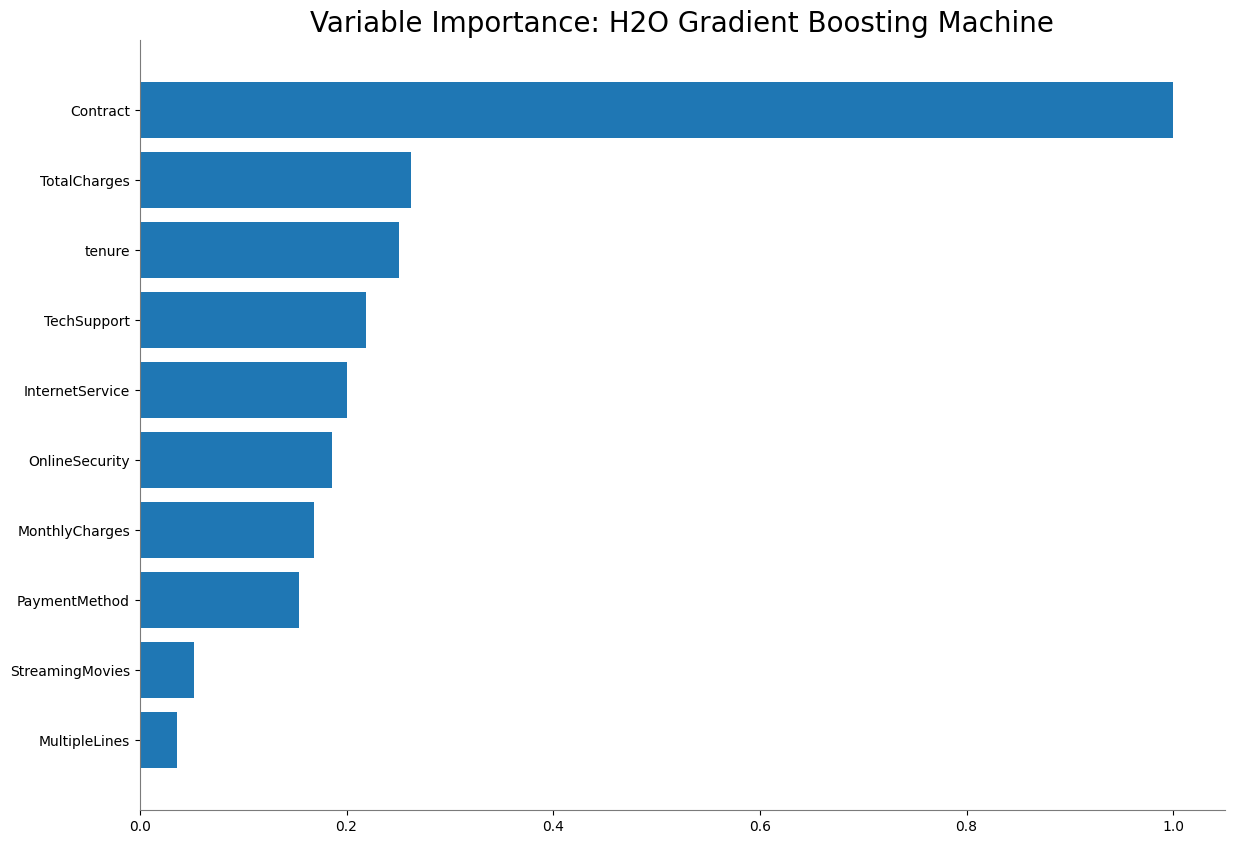

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3027.0,602.0,0.1659,(602.0/3629.0)
Yes,305.0,1031.0,0.2283,(305.0/1336.0)
Total,3332.0,1633.0,0.1827,(907.0/4965.0)


In [ ]:
outs.confusion_matrix()

,No,Yes,Error,Rate
No,3152.0,477.0,0.1314,(477.0/3629.0)
Yes,290.0,1046.0,0.2171,(290.0/1336.0)
Total,3442.0,1523.0,0.1545,(767.0/4965.0)


In [ ]:
#it will taKE the model here it takes the leader model which is GBM
# and creates a mojo object that can easily deploy a python, java
# it has all the depencies for you and highly optmized
# to perform fast exicution in production enviromnet

aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20241121_154456.zip'